<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [19]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [20]:

# libraries to be loaded

!pip install kneed # installing for automating the clusters detection
!pip install video-kf # installing the video extration library

import cv2
import os,shutil
import numpy as np
import pandas as pd
from keras.models import load_model, Model

import videokf as vf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import matplotlib.image as mpimg
from google.colab import files as fp
%matplotlib inline
from kneed import KneeLocator, DataGenerator

In [21]:
#reading the extracted keyframes

def get_imagefiles(path_to_files, size):
    final_imgs = []
    image_files = [file for file in os.listdir(path_to_files)]
    for imagefile in image_files:
        img = cv2.resize(cv2.imread(path_to_files+"//"+imagefile), size)
        os.rename(path_to_files+"//"+imagefile,path_to_files+"//"+filename+"_"+imagefile)        
        final_imgs.append([filename+"_"+imagefile, img])
    return dict(final_imgs)

In [22]:
def imagefeature_process_vector(images_arr, model):
    # image will be of shape (1, 224, 224, 3) after preprocess
    array4dim = np.expand_dims(images_arr, axis=0) 
    arr_processed = preprocess_input(array4dim)
    return model.predict(arr_processed)[0,:]

In [23]:
def imagefeature_vectors(images_dict, model):
    feature_vect = {}
    for fn, img in images_dict.items():
        feature_vect[fn] = imagefeature_process_vector(img, model)
    return feature_vect

In [24]:
# getting the model for processing , the model is inbuilt in keras
def get_model(layer='fc2'):
    base_model = VGG16(weights='imagenet', include_top=True)
    model = Model(inputs=base_model.input,
                outputs=base_model.get_layer(layer).output)
    model.summary()
    return model

In [25]:

# below respectives folders are to be created before execution except the "keyframes folder" 
cluster_path = './drive/MyDrive/clusters' # path of the folder where the clusters will be stored 
path_to_file ='./drive/MyDrive/videos/keyframes' # the keyframes folder that is to be created automatically by extract keyframes function of video-kf library
all_videos_path= './drive/MyDrive/videos/'   # The single folder where all the videos have been uploaded
finalsampledimages='./drive/MyDrive/FinalImages/' # Path of the folder where all the images are saved for furture modeling purpose

# running through the video files 
video_files = [file for file in os.listdir(all_videos_path)]
print("There are "+" "+str(len(video_files))+" videos present in the folder")


There are  4 videos present in the folder


Processing the video :  001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review.mp4
!!! The output directory 'keyframes' is not empty. No iframes were extracted. !!!
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)

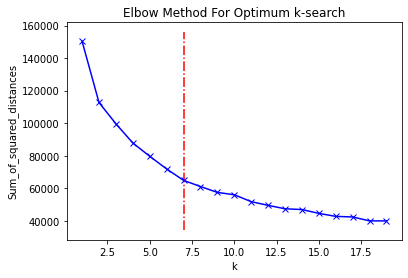

./drive/MyDrive/videos/keyframes//001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_0.jpg
./drive/MyDrive/videos/keyframes//001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_30.jpg
./drive/MyDrive/videos/keyframes//001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_90.jpg
./drive/MyDrive/videos/keyframes//001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 Math 1A_1B - Pre-Calculus - Algebra and Geometry Review_001 

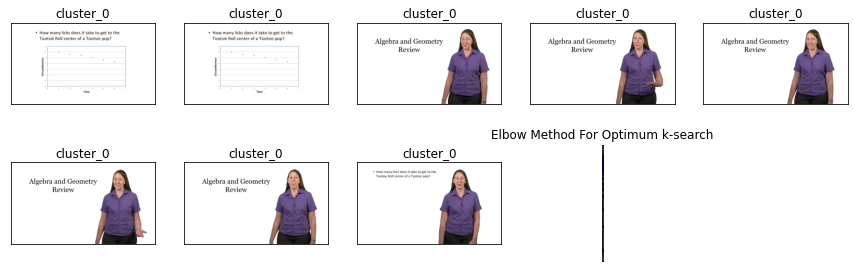

./drive/MyDrive/videos/keyframes//004 Math 1A_1B - Pre-Calculus - Adding and Subtracting Polynomials_0.jpg
./drive/MyDrive/videos/keyframes//004 Math 1A_1B - Pre-Calculus - Adding and Subtracting Polynomials_2.jpg
./drive/MyDrive/videos/keyframes//004 Math 1A_1B - Pre-Calculus - Adding and Subtracting Polynomials_150.jpg
./drive/MyDrive/videos/keyframes//004 Math 1A_1B - Pre-Calculus - Adding and Subtracting Polynomials_203.jpg
./drive/MyDrive/videos/keyframes//004 Math 1A_1B - Pre-Calculus - Adding and Subtracting Polynomials_300.jpg
./drive/MyDrive/videos/keyframes//004 Math 1A_1B - Pre-Calculus - Adding and Subtracting Polynomials_450.jpg
./drive/MyDrive/videos/keyframes//004 Math 1A_1B - Pre-Calculus - Adding and Subtracting Polynomials_600.jpg
./drive/MyDrive/videos/keyframes//004 Math 1A_1B - Pre-Calculus - Adding and Subtracting Polynomials_750.jpg
./drive/MyDrive/videos/keyframes//004 Math 1A_1B - Pre-Calculus - Adding and Subtracting Polynomials_900.jpg
./drive/MyDrive/videos/

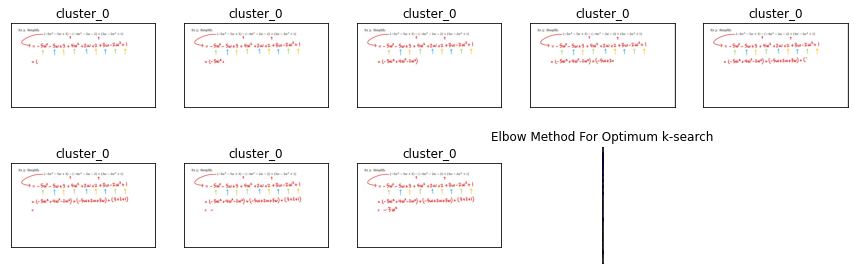

./drive/MyDrive/videos/keyframes//003 Math 1A_1B - Pre-Calculus - Absolute Value Inequalities_0.jpg
./drive/MyDrive/videos/keyframes//003 Math 1A_1B - Pre-Calculus - Absolute Value Inequalities_1.jpg
./drive/MyDrive/videos/keyframes//003 Math 1A_1B - Pre-Calculus - Absolute Value Inequalities_135.jpg
./drive/MyDrive/videos/keyframes//003 Math 1A_1B - Pre-Calculus - Absolute Value Inequalities_150.jpg
./drive/MyDrive/videos/keyframes//003 Math 1A_1B - Pre-Calculus - Absolute Value Inequalities_192.jpg
./drive/MyDrive/videos/keyframes//003 Math 1A_1B - Pre-Calculus - Absolute Value Inequalities_204.jpg
./drive/MyDrive/videos/keyframes//003 Math 1A_1B - Pre-Calculus - Absolute Value Inequalities_300.jpg
./drive/MyDrive/videos/keyframes//003 Math 1A_1B - Pre-Calculus - Absolute Value Inequalities_450.jpg
./drive/MyDrive/videos/keyframes//003 Math 1A_1B - Pre-Calculus - Absolute Value Inequalities_600.jpg
./drive/MyDrive/videos/keyframes//003 Math 1A_1B - Pre-Calculus - Absolute Value Inequ

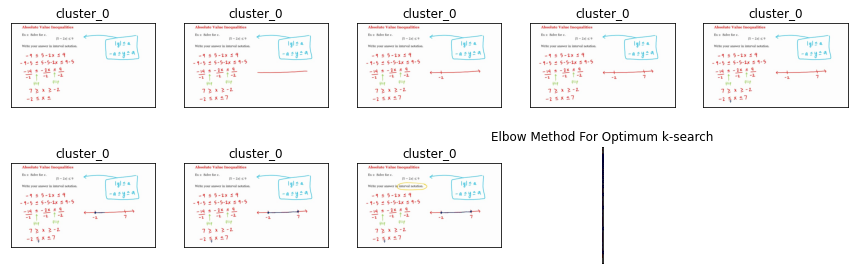

./drive/MyDrive/videos/keyframes//002 Math 1A_1B - Pre-Calculus - Absolute Value Equations_0.jpg
./drive/MyDrive/videos/keyframes//002 Math 1A_1B - Pre-Calculus - Absolute Value Equations_2.jpg
./drive/MyDrive/videos/keyframes//002 Math 1A_1B - Pre-Calculus - Absolute Value Equations_150.jpg
./drive/MyDrive/videos/keyframes//002 Math 1A_1B - Pre-Calculus - Absolute Value Equations_300.jpg
./drive/MyDrive/videos/keyframes//002 Math 1A_1B - Pre-Calculus - Absolute Value Equations_450.jpg
./drive/MyDrive/videos/keyframes//002 Math 1A_1B - Pre-Calculus - Absolute Value Equations_600.jpg
./drive/MyDrive/videos/keyframes//002 Math 1A_1B - Pre-Calculus - Absolute Value Equations_750.jpg
./drive/MyDrive/videos/keyframes//002 Math 1A_1B - Pre-Calculus - Absolute Value Equations_900.jpg
./drive/MyDrive/videos/keyframes//002 Math 1A_1B - Pre-Calculus - Absolute Value Equations_1050.jpg
./drive/MyDrive/videos/keyframes//002 Math 1A_1B - Pre-Calculus - Absolute Value Equations_1200.jpg
./drive/MyDr

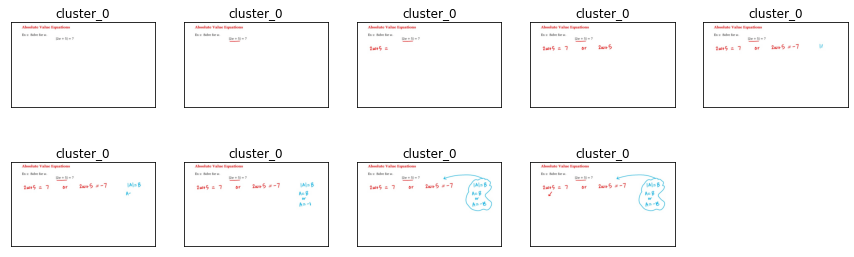

In [29]:
# Unsupervised approach for clustering and modeling study using K-means mainly to extract and cluster the key frames of a video

variablity_features=pd.DataFrame()
variablity=[]
video_name=[]

# running for each video file in a loop for every file in the folder 

for video in video_files :
  print("Processing the video : ",video)
  filename=video.split(".")[0] # getting the filename
  vf.extract_keyframes(all_videos_path+"//"+video, method="iframes")
  images_dict = get_imagefiles(path_to_files = path_to_file,size = (224, 224))
  model = get_model() # getting the vgg16 inbuilt model of Keras

# Feed the images through the model and extract the feature vectors of respective images.

  img_feature_vector = imagefeature_vectors(images_dict, model)
  images = list(img_feature_vector.values())
  fns = list(img_feature_vector.keys())
  sum_of_squared_distances_list = []
  K_values = np.arange(1, 20)
  for k in K_values:
    km = KMeans(n_clusters=k)
    km = km.fit(images)
    sum_of_squared_distances_list.append(km.inertia_)
  # automation of elbow method 
  kn = KneeLocator(K_values, sum_of_squared_distances_list, curve='convex', direction='decreasing')
  video_name.append(video)
  variablity.append(kn.knee)
  print("Optimal number of clusters for "+video+" "+"is ",kn.knee)

  #Plotting the cluster performance to find the optimal cluster numbers

  plt.plot(K_values, sum_of_squared_distances_list, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimum k-search')
  plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashdot',color="red")
  plt.show()
  data=np.array(list(zip(sum_of_squared_distances_list,K_values)))
  
  # cluster formation and saving the clusters for respective images
  file_names = list(images_dict.keys())
  kmeans = KMeans(n_clusters=kn.knee, init='k-means++')
  kmeans.fit(images)
  y_kmeans = kmeans.predict(images)
  #file_names = list(images_dict.keys())
  n_clusters = kn.knee
  for counts in range(0,n_clusters):
    if not os.path.exists(cluster_path+"//"+filename+"_"+'cluster_'+str(counts)):
        os.mkdir(cluster_path+"//"+filename+"_"+'cluster_'+str(counts))
  #feature variation 
  for feature_image, cluster in zip(file_names, y_kmeans):
    image = cv2.imread(path_to_file+"//"+feature_image)
    print(path_to_file+"//"+feature_image)
    cv2.imwrite(cluster_path+"//"+filename+"_"+'cluster_'+str(cluster)+'//'+feature_image, image)
  fig = plt.figure(figsize=(15, 15))
  #printing out the cluster 0 contain of the video
  images_list = [file for file in os.listdir(cluster_path+"//"+filename+"_"+'cluster_'+str(0))]
  for cnt, data in enumerate(images_list[1:10]):
    y = fig.add_subplot(6, 5, cnt+1)
    cluster_img = mpimg.imread(cluster_path+"//"+filename+"_"+'cluster_'+str(0)+"//"+data)
    y.imshow(cluster_img)
    plt.title('cluster_0')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False) 
  images_dict.clear()
  files = [file for file in os.listdir(path_to_file)]
  for i in files: 
      shutil.move(path_to_file+"//"+i,finalsampledimages) #moving all the extracted images to a common folder
variablity_features["Video"]=video_name
variablity_features["Variablity_clusters"]=variablity
#Segregating the variablity
variablity_features.to_csv('variablity_study.csv') # studying the variability of a video


In [30]:
# download the file of variabilty of cluster formation in each images
fp.download('variablity_study.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>